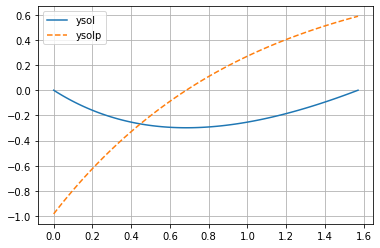

In [2]:
# 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

def f(x,y):
    f1 = y[1]
    f2 = -y[1] +1
    return np.vstack([f1,f2])
  
def bc(ya, yb):    
    return np.array([ya[0],yb[0]])

a = 0
b = np.pi/2
x = np.linspace(a,b,10)
y = np.zeros([2,x.size])

sol = solve_bvp(f,bc,x,y)

xa = np.linspace(a,b,100)
plt.plot(xa,sol.sol(xa)[0],'-',label='ysol')
plt.plot(xa,sol.sol(xa)[1],'--',label='ysolp')
plt.legend()
plt.grid()
plt.show()

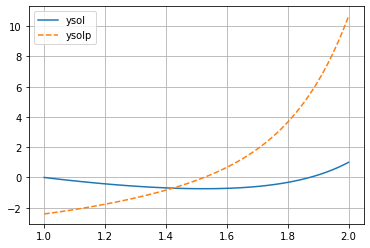

In [6]:
# 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

def f(x,y):
    f1 = y[1]
    f2 = (y[1]+4*x**3*y[0]+1+4*x**4)/x
    return np.vstack([f1,f2])
  
def bc(ya, yb):    
    return np.array([ya[0],yb[0]-1])

a = 1
b = 2
x = np.linspace(a,b,10)
y = np.zeros([2,x.size])

sol = solve_bvp(f,bc,x,y)

xa = np.linspace(a,b,100)
plt.plot(xa,sol.sol(xa)[0],'-',label='ysol')
plt.plot(xa,sol.sol(xa)[1],'--',label='ysolp')
plt.legend()
plt.grid()
plt.show()

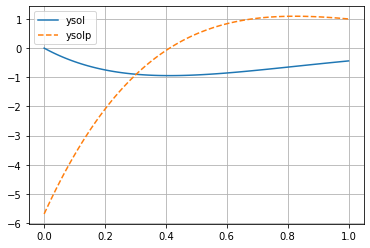

In [7]:
# 3
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

def f(x,y):
    f1 = y[1]
    f2 = -4*y[1] -7*y[0]
    return np.vstack([f1,f2])
  
def bc(ya, yb):    
    return np.array([ya[0],yb[1]-1])

a = 0
b = 1
x = np.linspace(a,b,10)
y = np.zeros([2,x.size])

sol = solve_bvp(f,bc,x,y)

xa = np.linspace(a,b,100)
plt.plot(xa,sol.sol(xa)[0],'-',label='ysol')
plt.plot(xa,sol.sol(xa)[1],'--',label='ysolp')
plt.legend()
plt.grid()
plt.show()

In [8]:
# 4-1
print('''
T = X*tau를 미분방정식에 대입하면
X*dtau/dt = c**2 * d**2*X/dx**2 * tau
-> (dtau/dt) / tau = c**2 * (d**2*X/dx**2) / X
X의 매개변수는 x  tau의 매개변수는 t 이므로
양변이 같기위해서는 상수여야 한다. 그 상수를 -lam**2 라고 하면
c**2 * (d**2*X/dx**2) / X = -lam**2
(dtau/dt) / tau = -lam**2

''')


T = X*tau를 미분방정식에 대입하면
X*dtau/dt = c**2 * d**2*X/dx**2 * tau
-> (dtau/dt) / tau = c**2 * (d**2*X/dx**2) / X
X의 매개변수는 x  tau의 매개변수는 t 이므로
양변이 같기위해서는 상수여야 한다. 그 상수를 -lam**2 라고 하면
c**2 * (d**2*X/dx**2) / X = -lam**2
(dtau/dt) / tau = -lam**2





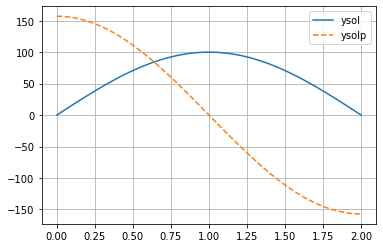

lambda  1.5708001744298934
70.7105897424092


In [64]:
# 4-2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
# c = 1 -> X''/X = -lam**2
def X(x,y,p):
    lam = p[0]
    X1 = y[1]
    X2 = -lam**2*y[0]
    return np.vstack([X1,X2])
  
def bc(ya, yb, p):
    lam = p[0]
    return np.array([ya[0],yb[0],ya[1] - 100*lam])

a = 0
b = 2
x = np.linspace(a,b,10)
y = np.zeros([2,x.size])
y[0][1:-1] = 100    # 
sol = solve_bvp(X,bc,x,y,p=[3])

xa = np.linspace(a,b,100)
plt.plot(xa,sol.sol(xa)[0],'-',label='ysol')
plt.plot(xa,sol.sol(xa)[1],'--',label='ysolp')
plt.legend()
plt.grid()
plt.show()
lam = sol.p[0]
print('lambda ',lam)
X_05 = sol.sol(0.5)[0]


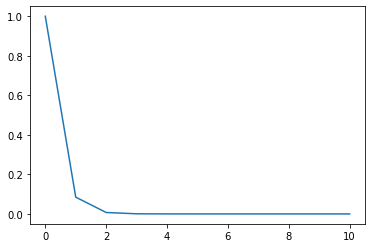

T(x=0.5,t=1) = 6.002617577603063


In [71]:
# 4-3
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def tau(x,y):
    tau1 = -lam**2*y[0]
    return np.vstack([tau1])

y0 = [1,0]    # [y0, y1] t = 0 일때
tspan = [0,10]
teval = np.linspace(0,max(tspan),11)
sol = solve_ivp(tau,tspan,y0,t_eval=teval,events=yfe)
plt.plot(sol.t,sol.y[0])
plt.show()
#print(sol)
print('T(x=0.5,t=1) =',sol.y[0][1]*X_05)
